# **1. Perkenalan Dataset**


Dataset: Loan Approval Classification Data
Sumber: Kaggle - https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
Deskripsi: Dataset untuk prediksi persetujuan pinjaman berdasarkan profil demografis dan finansial pemohon
Target: Binary Classification (1 = Approved, 0 = Rejected)
Ukuran: ~32,000 records dengan 12 features
Domain: Financial Services - Loan Risk Assessment

Business Context:
- Otomatisasi proses persetujuan pinjaman
- Risk assessment untuk mengurangi default rate  
- Meningkatkan efisiensi dan konsistensi keputusan kredit
- Regulatory compliance dan fair lending practices


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset loan approval dari file CSV dan melakukan pemeriksaan awal struktur data.

In [4]:
# Load dataset
df = pd.read_csv('../loan_data_raw/loan_data.csv')

# Tampilkan informasi dasar dataset
print("=== INFORMASI DATASET ===")
print(f"Shape dataset: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== PREVIEW DATA ===")
print(df.head())

print("\n=== INFO DATASET ===")
print(df.info())

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())

=== INFORMASI DATASET ===
Shape dataset: (45000, 14)
Columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

=== PREVIEW DATA ===
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0  

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# 4.1 Cek missing values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 4.2 Cek data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# 4.3 Cek unique values untuk categorical columns
print("\n=== UNIQUE VALUES (CATEGORICAL) ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Values: {df[col].unique()}")
    print()#Type your code here

=== MISSING VALUES ===
Series([], dtype: int64)

=== DATA TYPES ===
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

=== UNIQUE VALUES (CATEGORICAL) ===
person_gender: 2 unique values
Values: ['female' 'male']

person_education: 5 unique values
Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: 4 unique values
Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: 6 unique values
Values: ['PERSONAL' '

=== DISTRIBUSI TARGET VARIABLE ===
loan_status
0    35000
1    10000
Name: count, dtype: int64
Proporsi: 
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


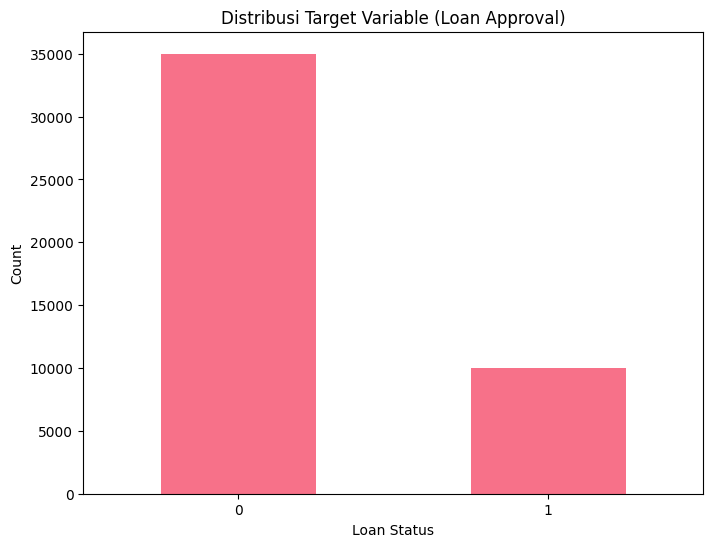

In [6]:
# 4.4 Analisis target variable
print("=== DISTRIBUSI TARGET VARIABLE ===")
target_col = 'loan_status'  # Sesuaikan dengan nama kolom target di dataset Anda
if target_col in df.columns:
    print(df[target_col].value_counts())
    print(f"Proporsi: \n{df[target_col].value_counts(normalize=True)}")
    
    # Visualisasi distribusi target
    plt.figure(figsize=(8, 6))
    df[target_col].value_counts().plot(kind='bar')
    plt.title('Distribusi Target Variable (Loan Approval)')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


=== NUMERICAL COLUMNS ===
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


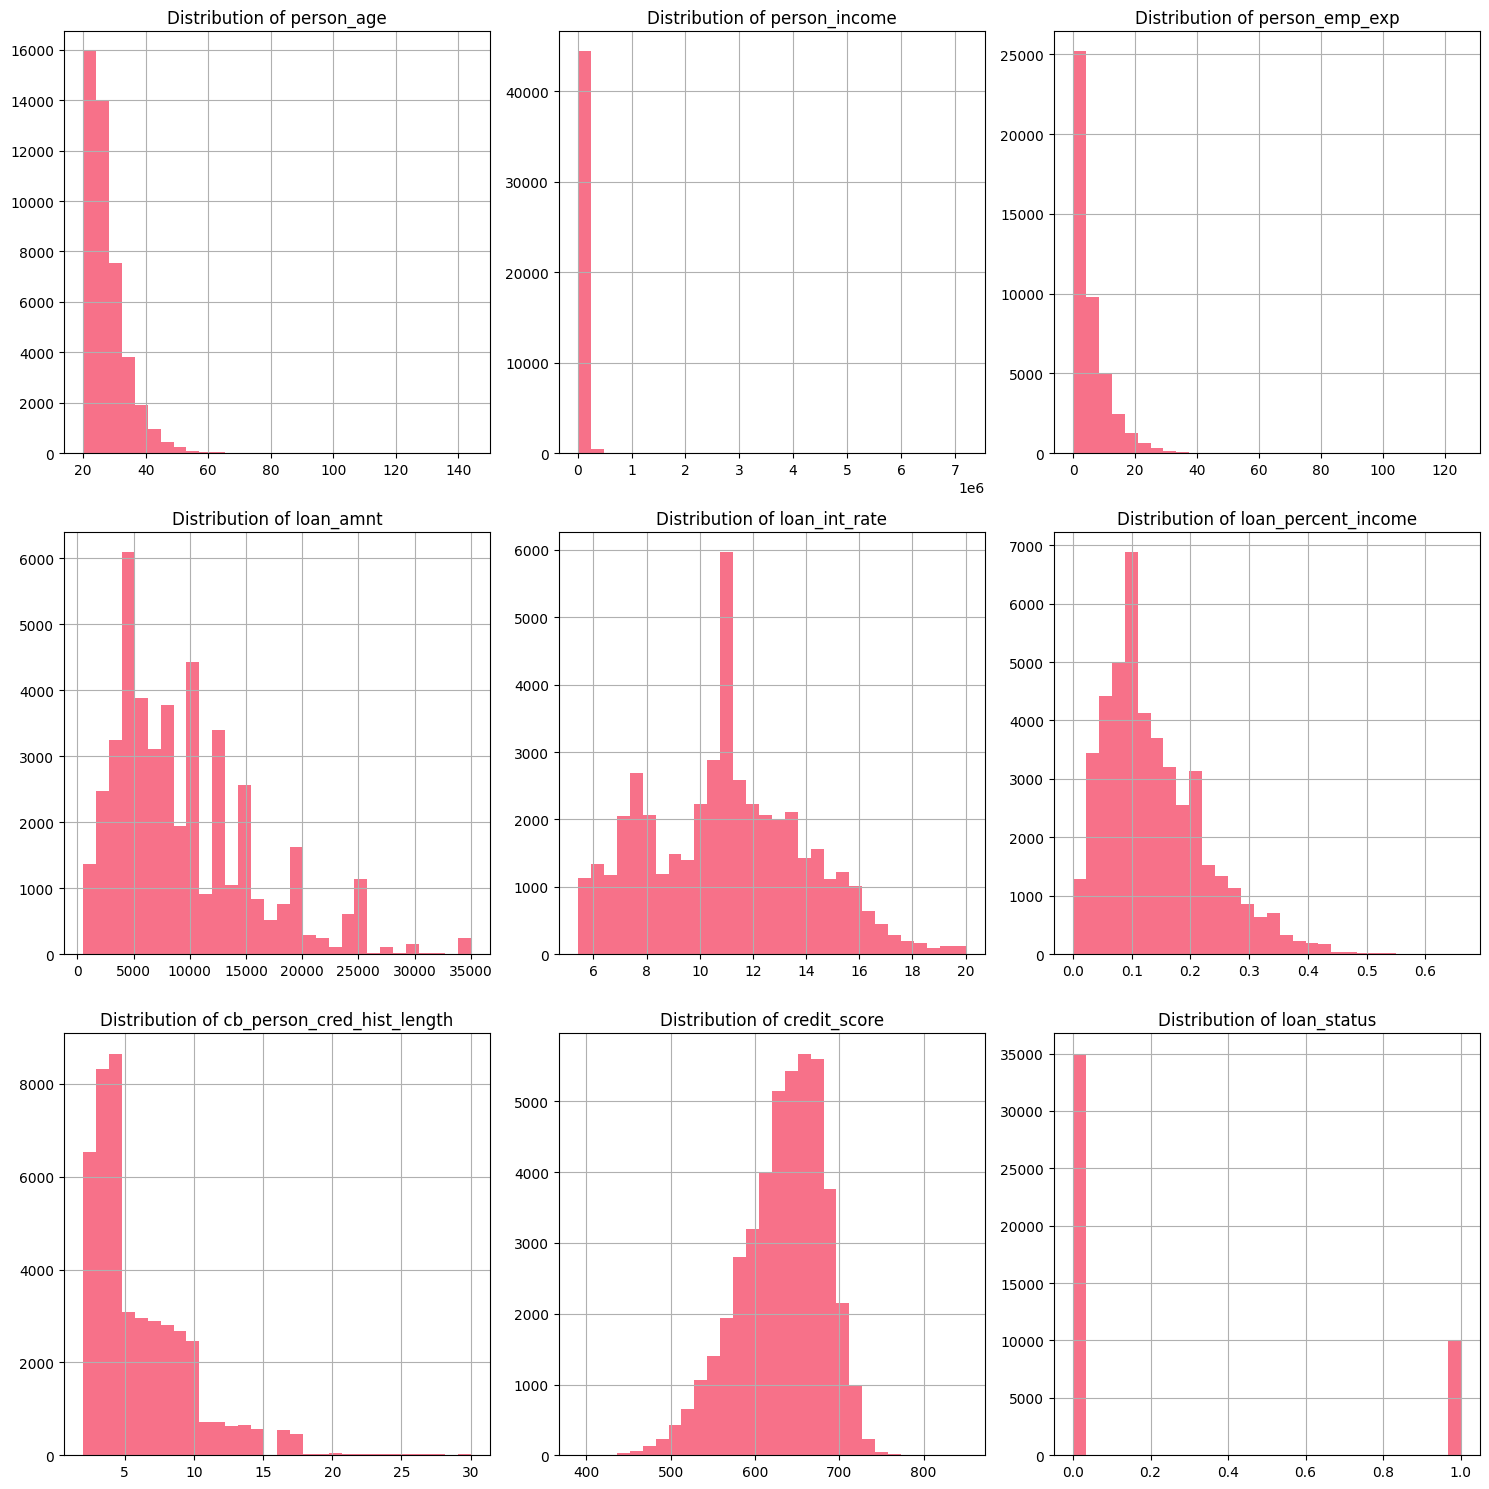

In [7]:
# 4.5 Analisis numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\n=== NUMERICAL COLUMNS ===")
print(list(numerical_cols))

# Visualisasi distribusi numerical features
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
    axes = axes.flatten() if len(numerical_cols) > 3 else [axes]
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
    
    # Hide unused subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

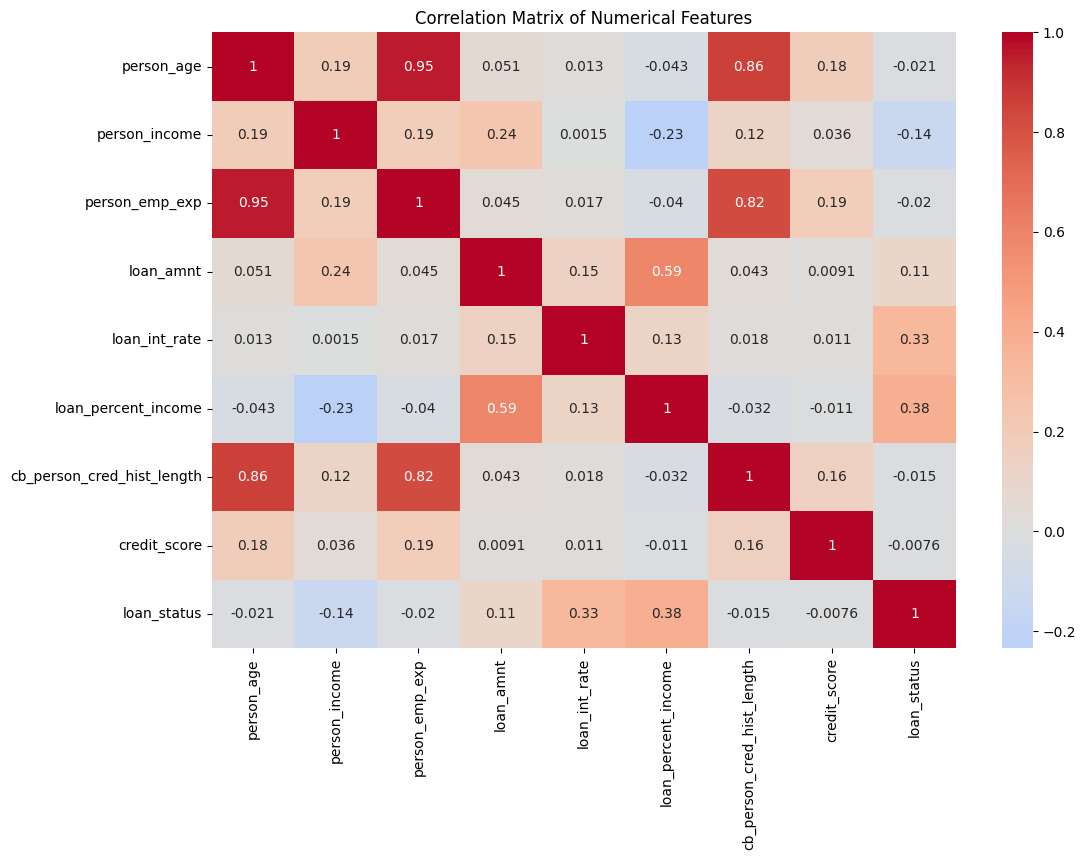

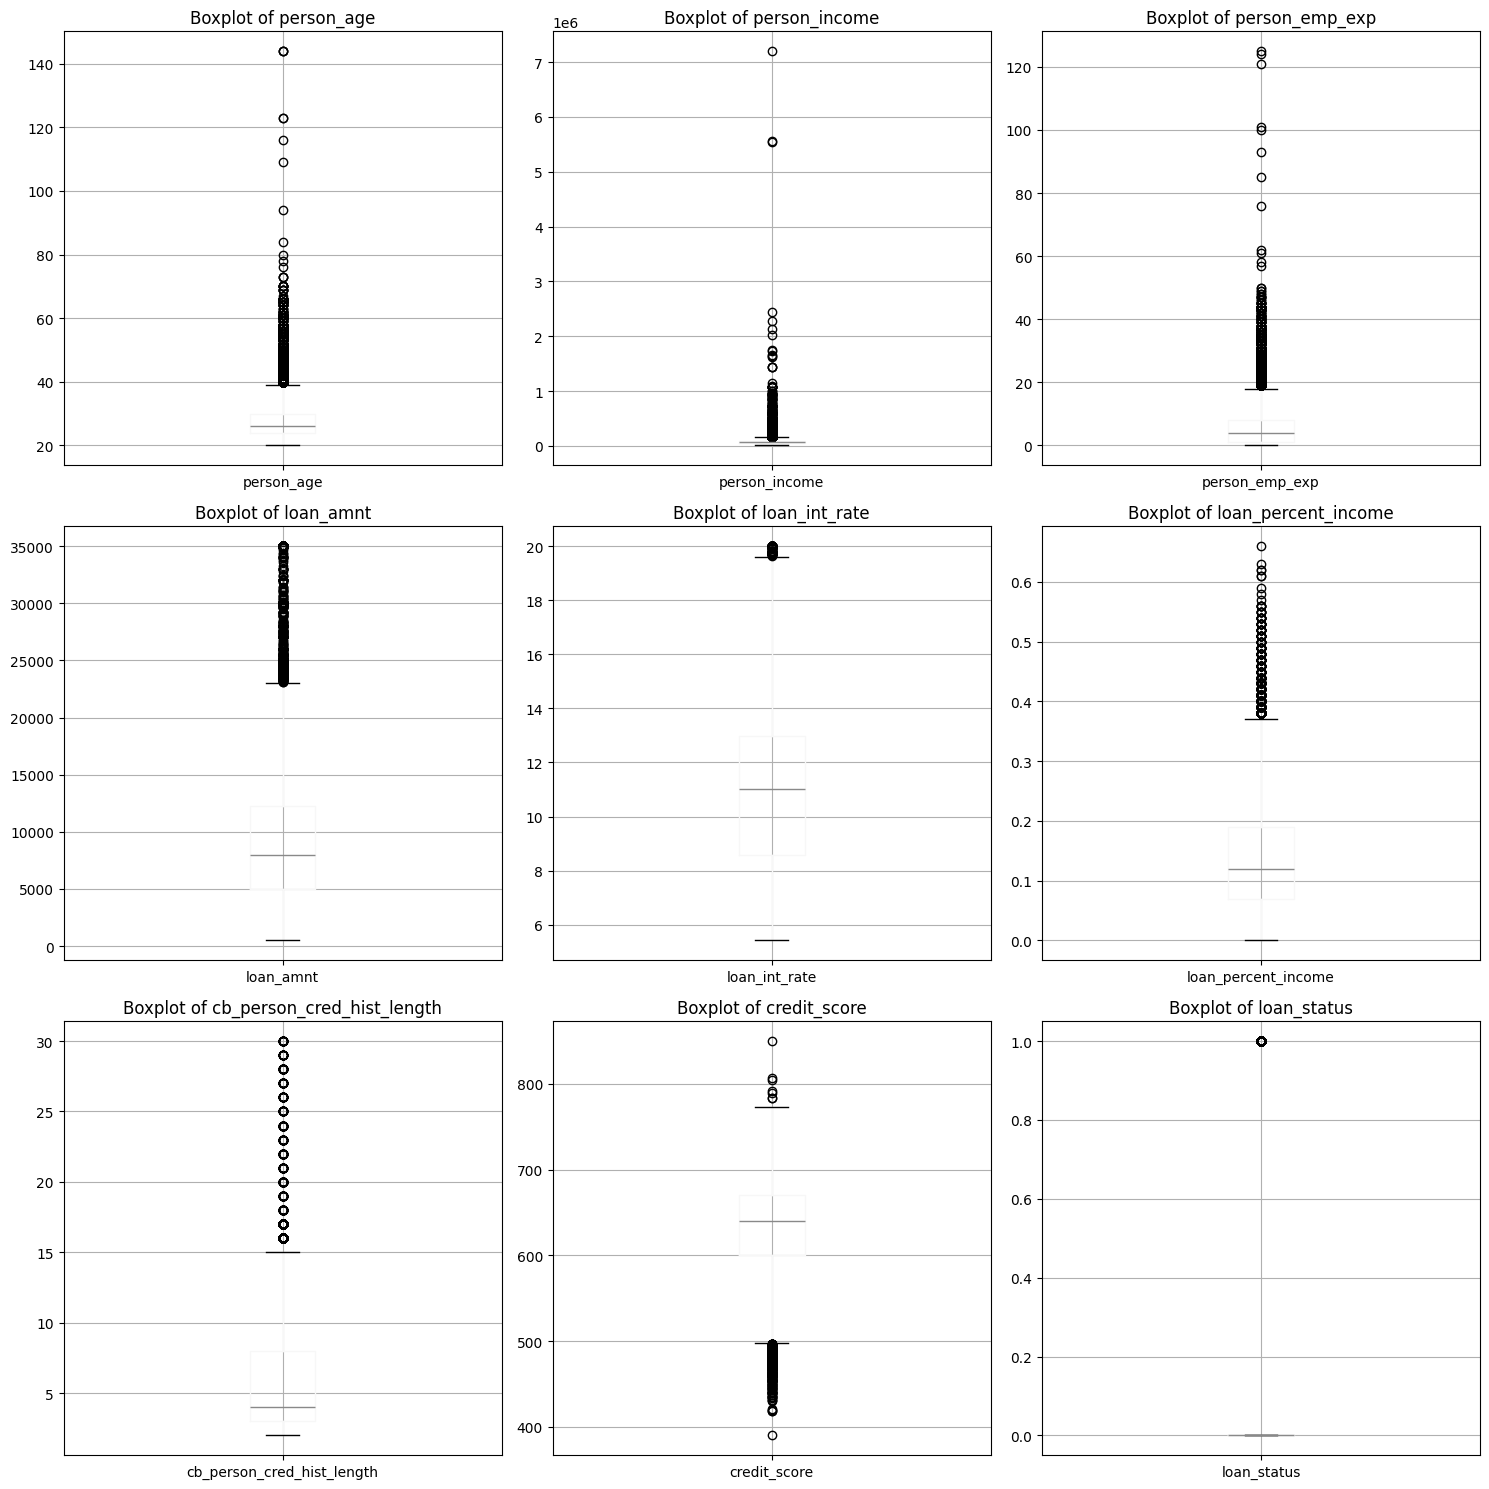

In [8]:
# 4.6 Correlation matrix
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# 4.7 Boxplot untuk detect outliers
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
    axes = axes.flatten() if len(numerical_cols) > 3 else [axes]
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
    
    # Hide unused subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, kita akan melakukan preprocessing data untuk mempersiapkan data agar siap digunakan untuk training model machine learning.

In [9]:
# Buat copy dari dataset original
df_processed = df.copy()

# 5.1 Handle Missing Values
print("=== HANDLING MISSING VALUES ===")
missing_values = df_processed.isnull().sum()
print("Missing values sebelum treatment:")
print(missing_values[missing_values > 0])

# Strategy untuk handling missing values
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype in ['int64', 'float64']:
            # Numerical: fill with median
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
            print(f"Filled {col} (numerical) with median")
        else:
            # Categorical: fill with mode
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            print(f"Filled {col} (categorical) with mode")

print("\nMissing values setelah treatment:")
print(df_processed.isnull().sum().sum())

# 5.2 Remove Duplicates
print(f"\n=== REMOVE DUPLICATES ===")
print(f"Duplicate rows sebelum: {df_processed.duplicated().sum()}")
df_processed = df_processed.drop_duplicates()
print(f"Duplicate rows setelah: {df_processed.duplicated().sum()}")
print(f"Shape setelah remove duplicates: {df_processed.shape}")

# 5.3 Handle Outliers (menggunakan IQR method)
print(f"\n=== HANDLE OUTLIERS ===")
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    if col != target_col:  # Skip target column
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        
        # Cap outliers instead of removing them
        df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
        df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
        
        outliers_after = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        
        if outliers_before > 0:
            print(f"{col}: {outliers_before} outliers capped")


=== HANDLING MISSING VALUES ===
Missing values sebelum treatment:
Series([], dtype: int64)

Missing values setelah treatment:
0

=== REMOVE DUPLICATES ===
Duplicate rows sebelum: 0
Duplicate rows setelah: 0
Shape setelah remove duplicates: (45000, 14)

=== HANDLE OUTLIERS ===
person_age: 2188 outliers capped
person_income: 2218 outliers capped
person_emp_exp: 1724 outliers capped
loan_amnt: 2348 outliers capped
loan_int_rate: 124 outliers capped
loan_percent_income: 744 outliers capped
cb_person_cred_hist_length: 1366 outliers capped
credit_score: 467 outliers capped


In [10]:
# 5.4 Encoding Categorical Variables
print(f"\n=== ENCODING CATEGORICAL VARIABLES ===")
categorical_cols = df_processed.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != target_col]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} categories")

# 5.5 Feature Scaling
print(f"\n=== FEATURE SCALING ===")
# Separate features and target
if target_col in df_processed.columns:
    X = df_processed.drop(target_col, axis=1)
    y = df_processed[target_col]
else:
    # If target column name is different, adjust accordingly
    print("Warning: Target column not found. Please check column names.")
    print("Available columns:", df_processed.columns.tolist())
    # Assume last column is target for now
    X = df_processed.iloc[:, :-1]
    y = df_processed.iloc[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")


=== ENCODING CATEGORICAL VARIABLES ===
Encoded person_gender: 2 categories
Encoded person_education: 5 categories
Encoded person_home_ownership: 4 categories
Encoded loan_intent: 6 categories
Encoded previous_loan_defaults_on_file: 2 categories

=== FEATURE SCALING ===
Features shape: (45000, 13)
Target shape: (45000,)


In [11]:
# 5.6 Train-Test Split
print(f"\n=== TRAIN-TEST SPLIT ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution: \n{pd.Series(y_train).value_counts()}")
print(f"y_test distribution: \n{pd.Series(y_test).value_counts()}")


=== TRAIN-TEST SPLIT ===
X_train shape: (36000, 13)
X_test shape: (9000, 13)
y_train distribution: 
loan_status
0    28000
1     8000
Name: count, dtype: int64
y_test distribution: 
loan_status
0    7000
1    2000
Name: count, dtype: int64


In [12]:
# 5.7 Save Preprocessed Data
print(f"\n=== SAVE PREPROCESSED DATA ===")
# Create directory jika belum ada
import os
os.makedirs('../preprocessing/loan_data_preprocessing', exist_ok=True)

# Save processed data
X_train.to_csv('../preprocessing/loan_data_preprocessing/X_train.csv', index=False)
X_test.to_csv('../preprocessing/loan_data_preprocessing/X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('../preprocessing/loan_data_preprocessing/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('../preprocessing/loan_data_preprocessing/y_test.csv', index=False)

# Save preprocessors
import joblib
joblib.dump(scaler, '../preprocessing/loan_data_preprocessing/scaler.pkl')
joblib.dump(label_encoders, '../preprocessing/loan_data_preprocessing/label_encoders.pkl')

print("Preprocessed data dan preprocessors telah disimpan!")


=== SAVE PREPROCESSED DATA ===
Preprocessed data dan preprocessors telah disimpan!


In [13]:
# 5.8 Quick Model Test
print(f"\n=== QUICK MODEL TEST ===")
# Test dengan simple model untuk memastikan data siap digunakan
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Quick test accuracy dengan Random Forest: {accuracy:.4f}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

print("\n=== PREPROCESSING SELESAI ===")
print("Data siap untuk tahap modeling!")


=== QUICK MODEL TEST ===
Quick test accuracy dengan Random Forest: 0.9281
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


=== PREPROCESSING SELESAI ===
Data siap untuk tahap modeling!
